# Jupyter Data Science Workflow

Video 1 of 10

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
plt.style.use('seaborn')

from jupyter_workflow import data, save_load_file

### Getting data into pandas
The below cell should **ONLY** be used the first time the data is loaded or if data in the url location has been updated. Else use **Load pandas Dataframe** below. 

In [ ]:
# Raw data location
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

# Name of raw data after downloading
rawdata_filename = 'Fremont.csv'

# Getting raw data into a dataframe
rawdata=data.get_url_rawdata(name_rawdata_file=rawdata_filename, url=URL)
data = data.read_csvdata_to_df_with_dateindex(rawdata_filename=rawdata, column_names=['Total', 'East', 'West'], parse_dates=True)
save_load_file.save_object(data, 'data')

### Load pandas Dataframe
The below cell should be used when data is already loaded into pandas dataframe and are up to date. Else use **Getting data into pandas** above.

In [4]:
data=save_load_file.load_object('/home/jesper/Work/ReprodcibleDA/JupyterWorkflow/data.sav')
data

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-08-31 19:00:00,190.0,79.0,111.0
2020-08-31 20:00:00,108.0,58.0,50.0
2020-08-31 21:00:00,33.0,11.0,22.0


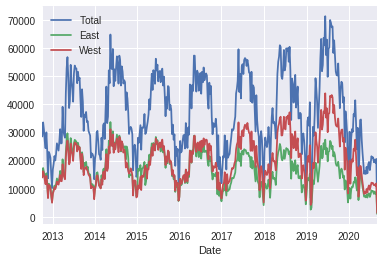

In [5]:
# From hourly data plot to week sum data plot
data.resample('W').sum().plot();

Video 2 of 10

## from matplot default to seaborn style

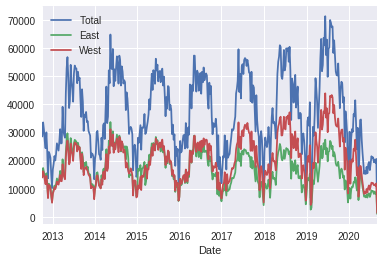

In [6]:
# more concise legends

data.resample('W').sum().plot();


## Show annual numbers, using the rolling feature

(0, 2511716.95)

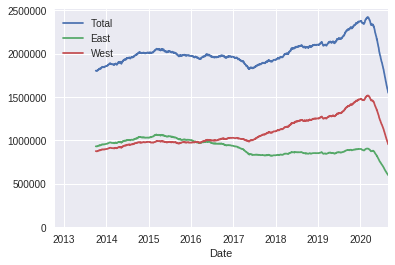

In [7]:
# It sums one year of daily sum of numbers, so the graphs first start out a year later than the data is collected
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None)

## Making pivot table to show individual days using groupby()

In [8]:
data.index[6:10]

DatetimeIndex(['2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

           Total        East        West
Date                                    
0      11.304902    4.791541    6.513360
1       5.984074    2.680764    3.303309
2       3.938453    1.890032    2.048421
3       2.903557    1.493895    1.409662
4       6.487878    3.440807    3.047071
5      25.589630   15.619182    9.970448
6      89.945496   54.047779   35.897717
7     227.002831  140.801982   86.200849
8     322.147231  189.640241  132.506990
9     188.577093  102.221101   86.355992
10    100.344840   52.377766   47.967074
11     89.222340   46.166578   43.055762
12     95.248008   48.234024   47.013985
13    101.929747   50.690143   51.239604
14    111.129204   53.007611   58.121593
15    141.325841   62.540531   78.785310
16    232.995752   83.464425  149.531327
17    389.189381  112.824956  276.364425
18    264.838761   89.667965  175.170796
19    130.602301   49.622124   80.980177
20     75.016991   30.491858   44.525133
21     47.885133   20.899292   26.985841
22     31.201770

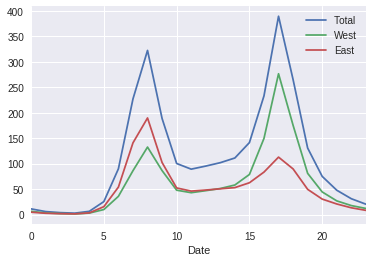

In [9]:
# First we make a groupby where we take the hourly count of bikes during a day hours of a day for  
print(data.groupby(data.index.hour).mean())
data.groupby(data.index.hour).mean().plot(y=['Total', 'West', 'East']);

          2012-10-03  2012-10-04  2012-10-05  2012-10-06  2012-10-07
00:00:00        13.0        18.0        11.0        15.0        11.0
01:00:00        10.0         3.0         8.0        15.0        17.0
02:00:00         2.0         9.0         7.0         9.0         3.0
03:00:00         5.0         3.0         4.0         3.0         6.0
04:00:00         7.0         8.0         9.0         5.0         3.0


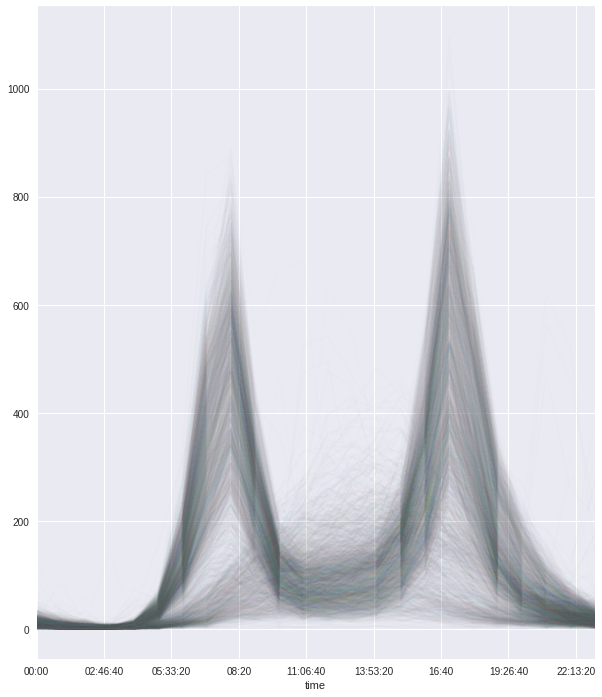

In [10]:
pivot_table= data.pivot_table('Total', index=data.index.time, columns=data.index.date)
print(pivot_table.iloc[0:5, 0:5])
pivot_table.plot(legend=False, alpha=0.01, figsize=(10,12));

In [11]:
import numpy as np
data['weekday'] = data.index.weekday
data['weekend'] = np.where(data['weekday']>4, True, False)
cols = ['weekday','weekend', 'East', 'West', 'Total']
data = data[cols]
data

,weekday,weekend,East,West,Total
Date,,,,,
2012-10-03 00:00:00,2,False,4.0,9.0,13.0
2012-10-03 01:00:00,2,False,4.0,6.0,10.0
2012-10-03 02:00:00,2,False,1.0,1.0,2.0
2012-10-03 03:00:00,2,False,2.0,3.0,5.0
2012-10-03 04:00:00,2,False,6.0,1.0,7.0
...,...,...,...,...,...
2020-08-31 19:00:00,0,False,79.0,111.0,190.0
2020-08-31 20:00:00,0,False,58.0,50.0,108.0
2020-08-31 21:00:00,0,False,11.0,22.0,33.0


weekend     False      True 
Date                        
0        9.457766  15.925031
1        4.685410   9.232342
2        3.124102   5.991880
3        2.684667   3.451053
4        7.548427   3.835192


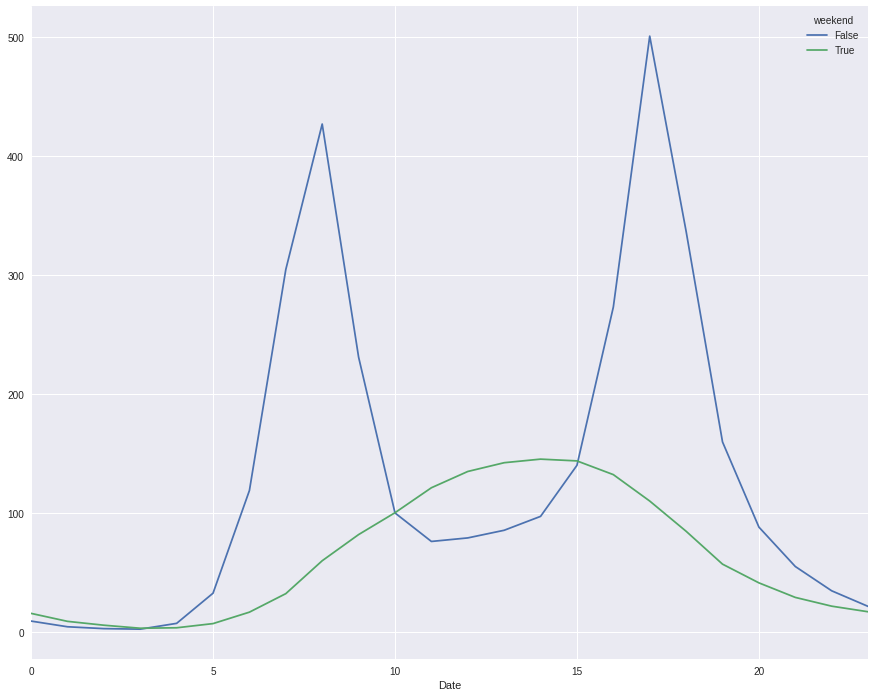

In [12]:
pivot_table2= data.pivot_table('Total', index=data.index.hour, columns='weekend')
print(pivot_table2.iloc[0:5])
pivot_table2.plot(figsize=(15,12));